# Proyek Klasifikasi Gambar: Animal-Dataset
- **Nama:** Attiya Dianti Fadli
- **Email:** attiyadiantifadli@gmail.com
- **ID:** MC189D5X0806

## Import Semua Packages/Library yang Digunakan

Menggunakan tensorflow 2.15 karena 2.17 selalu membuat colab crash ketika save ke tflite.

In [9]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [10]:
!pip install tensorflowjs

  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


In [11]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached tensorboard-2.15.2-py3-none-a

Melakukan import library yang digunakan untuk keseluruhan proyek.

In [12]:
# Import standard libraries
import os
import random
import shutil
import pathlib

# Import PIL for image processing
from PIL import Image

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

In [13]:
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.15.0


## Data Preparation

### Data Loading

Dataset asli berasal dari [Kaggle](https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset/data), tetapi telah diunggah ke Google Drive pribadi untuk mempermudah pengunduhan.

In [14]:
# Download File
!gdown 1nVTp7STyfbbvcTIj2SOScDs36OF9jD_P

Downloading...
From (original): https://drive.google.com/uc?id=1nVTp7STyfbbvcTIj2SOScDs36OF9jD_P
From (redirected): https://drive.google.com/uc?id=1nVTp7STyfbbvcTIj2SOScDs36OF9jD_P&confirm=t&uuid=30dd918c-f956-4e06-a703-07ffa820e10a
To: /content/color.zip
100% 858M/858M [00:21<00:00, 40.0MB/s]


Mengekstrak file yang telah diunduh.

In [15]:
# Unzip File
!unzip color.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9a91794ec9___UF.GRC_YLCV_Lab 09340.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/112779d4-27f3-4c5e-8813-b64d26ef7e03___UF

Membuat fungsi yang dapat menampilkan jumlah gambar dari setiap kelas serta menghitung jumlah gambar dengan resolusi tertentu.

In [16]:
def calculate_image_stats(directory_path, specific_resolution=None):
    # Menyimpan jumlah gambar untuk setiap kelas
    class_image_count = {}

    # Menyimpan jumlah gambar berdasarkan resolusi
    resolution_image_count = {}

    for root_folder, sub_folders, file_list in os.walk(directory_path):
        # Melewati direktori utama jika tidak berisi gambar
        if root_folder == directory_path:
            continue

        class_label = os.path.basename(root_folder)
        class_image_count[class_label] = len(file_list)

        for image_file in file_list:
            image_path = os.path.join(root_folder, image_file)
            with Image.open(image_path) as img:
                img_width, img_height = img.size
                img_resolution = f"{img_width}x{img_height}"

                if img_resolution not in resolution_image_count:
                    resolution_image_count[img_resolution] = 0
                resolution_image_count[img_resolution] += 1

                # Menghitung jumlah gambar dengan resolusi yang ditentukan
                if specific_resolution and img_resolution == specific_resolution:
                    if 'specific' not in resolution_image_count:
                        resolution_image_count['specific'] = 0
                    resolution_image_count['specific'] += 1

    return class_image_count, resolution_image_count

# Menentukan path folder utama
main_directory = "/content/color"

# Menentukan resolusi yang ingin dihitung
chosen_resolution = "256x256"

# Memanggil fungsi untuk mendapatkan data gambar
class_image_count, resolution_image_count = calculate_image_stats(main_directory, chosen_resolution)

# Menampilkan hasil
print("Jumlah gambar per kelas:")
for label, total in class_image_count.items():
    print(f"{label}: {total}")

print("\nJumlah gambar per resolusi:")
for res, total in resolution_image_count.items():
    print(f"{res}: {total}")

Jumlah gambar per kelas:
Strawberry___Leaf_scorch: 1109
Raspberry___healthy: 371
Tomato___healthy: 1591
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
Peach___healthy: 360
Tomato___Bacterial_spot: 2127
Grape___Esca_(Black_Measles): 1383
Soybean___healthy: 5090
Orange___Haunglongbing_(Citrus_greening): 5507
Cherry_(including_sour)___Powdery_mildew: 1052
Blueberry___healthy: 1502
Apple___Black_rot: 621
Corn_(maize)___healthy: 1162
Pepper,_bell___Bacterial_spot: 997
Potato___Early_blight: 1000
Tomato___Tomato_mosaic_virus: 373
Squash___Powdery_mildew: 1835
Grape___healthy: 423
Cherry_(including_sour)___healthy: 854
Corn_(maize)___Common_rust_: 1192
Tomato___Target_Spot: 1404
Apple___Cedar_apple_rust: 275
Peach___Bacterial_spot: 2297
Strawberry___healthy: 456
Tomato___Septoria_leaf_spot: 1771
Tomato___Leaf_Mold: 952
Tomato___Late_blight: 1909
Corn_(maize)___Northern_Leaf_Blight: 985
Potato___Late_blight: 1000
Tomato___Early_blight: 1000
Potato___healthy: 152
Apple___Apple_scab: 630
Grape

Terdapat 54.305 gambar yang dikelompokkan ke dalam 38 kelas yang berbeda. Setiap gambar di setiap kelas memiliki resolusi 256x256.

Karena dalam prject di Dicoding perlu ada gambar dengan berbagai resolusi, maka resolusi setiap gambar diubah secara manual.

Gambar diubah menjadi resolusi antara 200 hingga 256. Gambar asli akan digantikan oleh gambar yang telah diubah resolusinya, sehingga jumlah dataset tidak bertambah.

In [17]:
def modify_and_overwrite_images(directory, min_size=200, max_size=256):
    for current_dir, sub_dirs, file_list in os.walk(directory):
        for image_name in file_list:
            image_path = os.path.join(current_dir, image_name)
            with Image.open(image_path) as image:

                new_w = random.randint(min_size, max_size)
                new_h = random.randint(min_size, max_size)

                # Mengubah ukuran gambar
                updated_image = image.resize((new_w, new_h), Image.LANCZOS)

                # Menyimpan kembali gambar yang telah diubah
                updated_image.save(image_path)

# Menentukan path direktori utama
directory_path = "/content/color"

# Memanggil fungsi untuk memproses gambar
modify_and_overwrite_images(directory_path)

Menampilkan kembali jumlah gambar untuk setiap resolusi.

In [18]:
def analyze_image_distribution(directory, desired_resolution=None):
    # Menyimpan jumlah gambar berdasarkan kategori
    category_counts = {}

    # Menyimpan jumlah gambar berdasarkan resolusi
    resolution_counts = {}

    for root_folder, sub_folders, file_list in os.walk(directory):
        # Lewati direktori utama jika tidak mengandung gambar
        if root_folder == directory:
            continue

        category_name = os.path.basename(root_folder)
        category_counts[category_name] = len(file_list)

        for image_name in file_list:
            image_path = os.path.join(root_folder, image_name)
            with Image.open(image_path) as img:
                img_width, img_height = img.size
                img_resolution = f"{img_width}x{img_height}"

                if img_resolution not in resolution_counts:
                    resolution_counts[img_resolution] = 0
                resolution_counts[img_resolution] += 1

                # Hitung jumlah gambar dengan resolusi yang ditentukan
                if desired_resolution and img_resolution == desired_resolution:
                    if 'specified' not in resolution_counts:
                        resolution_counts['specified'] = 0
                    resolution_counts['specified'] += 1

    return category_counts, resolution_counts

# Tentukan path direktori utama
directory_path = "/content/color"

# Tentukan resolusi yang akan dihitung
specified_resolution = "256x256"

# Panggil fungsi untuk mendapatkan distribusi gambar
category_counts, resolution_counts = analyze_image_distribution(directory_path, specified_resolution)

print("\nJumlah gambar per resolusi:")
for res, total in resolution_counts.items():
    print(f"{res}: {total}")


Jumlah gambar per resolusi:
206x238: 21
220x224: 11
211x255: 18
214x222: 32
209x202: 19
223x239: 18
208x226: 16
225x223: 21
229x240: 18
244x228: 22
217x217: 27
232x246: 21
248x213: 23
215x247: 16
210x246: 26
253x249: 25
252x211: 19
223x210: 16
232x228: 23
225x203: 16
256x241: 16
234x216: 11
246x247: 9
209x234: 14
220x238: 18
220x247: 18
221x250: 11
218x228: 19
226x232: 20
243x240: 14
211x227: 16
241x216: 18
206x228: 11
201x237: 20
215x241: 12
210x253: 21
219x240: 17
201x243: 12
224x213: 11
252x225: 15
256x254: 22
202x221: 12
239x227: 18
213x212: 14
222x212: 17
221x235: 18
227x208: 11
246x226: 20
252x222: 16
215x206: 15
216x252: 19
224x203: 19
234x223: 13
233x230: 11
233x234: 26
230x218: 25
253x207: 23
212x237: 19
217x214: 22
207x245: 25
245x240: 22
236x230: 19
221x242: 10
201x249: 20
204x237: 15
234x249: 18
210x211: 10
212x203: 22
245x205: 18
225x212: 17
254x218: 17
254x225: 16
237x202: 23
250x219: 16
208x256: 23
203x213: 14
211x236: 19
235x250: 19
211x250: 20
238x208: 15
252x205: 19


Terlihat bahwa saat ini gambar telah memiliki variasi resolusi.

### Data Preprocessing

Secara keseluruhan, terdapat 14 jenis tanaman yang berbeda. Namun, dalam proyek ini, akan difokuskan hanya pada tanaman tomat.

In [19]:
def calculate_image_counts(directory, specific_class="tomato"):
    total_images = 0
    specific_class_images = 0

    for current_dir, sub_dirs, file_list in os.walk(directory):
        total_images += len(file_list)
        if specific_class.lower() in current_dir.lower():
            specific_class_images += len(file_list)

    return total_images, specific_class_images

# Tentukan path direktori utama
directory_path = "/content/color"

# Hitung jumlah gambar
total_images, specific_class_images = calculate_image_counts(directory_path)

# Tampilkan hasil
print(f"Jumlah total gambar dalam dataset: {total_images}")
print(f"Jumlah gambar dalam kelas 'tomato': {specific_class_images}")

Jumlah total gambar dalam dataset: 54305
Jumlah gambar dalam kelas 'tomato': 18160


Menampilkan jumlah gambar untuk setiap subkelas tanaman tomat.

In [20]:
def count_images_by_subclass(directory, main_class="tomato"):
    subclass_image_counts = {}

    for current_dir, sub_dirs, file_list in os.walk(directory):
        if main_class.lower() in current_dir.lower():
            subclass_name = os.path.basename(current_dir)
            if subclass_name not in subclass_image_counts:
                subclass_image_counts[subclass_name] = 0
            subclass_image_counts[subclass_name] += len(file_list)

    return subclass_image_counts

# Tentukan path direktori utama
directory_path = "/content/color"

# Hitung jumlah gambar dalam kelas utama berdasarkan subkelas
image_counts_by_subclass = count_images_by_subclass(directory_path)

# Tampilkan hasil
print("Jumlah gambar dalam kelas 'tomato' untuk masing-masing subkelas:")
for subclass, count in image_counts_by_subclass.items():
    print(f"{subclass}: {count}")

Jumlah gambar dalam kelas 'tomato' untuk masing-masing subkelas:
Tomato___healthy: 1591
Tomato___Bacterial_spot: 2127
Tomato___Tomato_mosaic_virus: 373
Tomato___Target_Spot: 1404
Tomato___Septoria_leaf_spot: 1771
Tomato___Leaf_Mold: 952
Tomato___Late_blight: 1909
Tomato___Early_blight: 1000
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357


Memindahkan folder tanaman tomat dari `/color` ke `/dataset`

In [21]:
def duplicate_target_folders(source_directory, destination_directory="dataset", target_category="tomato"):
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    for current_dir, sub_dirs, file_list in os.walk(source_directory):
        for folder_name in sub_dirs:
            if target_category.lower() in folder_name.lower():
                source_path = os.path.join(current_dir, folder_name)
                destination_path = os.path.join(destination_directory, folder_name)
                if not os.path.exists(destination_path):
                    shutil.copytree(source_path, destination_path)
                    print(f"Menyalin {source_path} ke {destination_path}")

# Tentukan path folder sumber
source_directory = "/content/color"

# Tentukan path folder tujuan
destination_directory = "/content/dataset"

# Menyalin folder yang sesuai dengan kategori
duplicate_target_folders(source_directory, destination_directory)

Menyalin /content/color/Tomato___healthy ke /content/dataset/Tomato___healthy
Menyalin /content/color/Tomato___Bacterial_spot ke /content/dataset/Tomato___Bacterial_spot
Menyalin /content/color/Tomato___Tomato_mosaic_virus ke /content/dataset/Tomato___Tomato_mosaic_virus
Menyalin /content/color/Tomato___Target_Spot ke /content/dataset/Tomato___Target_Spot
Menyalin /content/color/Tomato___Septoria_leaf_spot ke /content/dataset/Tomato___Septoria_leaf_spot
Menyalin /content/color/Tomato___Leaf_Mold ke /content/dataset/Tomato___Leaf_Mold
Menyalin /content/color/Tomato___Late_blight ke /content/dataset/Tomato___Late_blight
Menyalin /content/color/Tomato___Early_blight ke /content/dataset/Tomato___Early_blight
Menyalin /content/color/Tomato___Spider_mites Two-spotted_spider_mite ke /content/dataset/Tomato___Spider_mites Two-spotted_spider_mite
Menyalin /content/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus ke /content/dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus


Menghapus prefix `Tomato___` dari nama-nama file.

In [22]:
def remove_prefix_from_folders(directory, prefix_to_remove="Tomato___"):
    for current_dir, sub_dirs, file_list in os.walk(directory):
        for folder in sub_dirs:
            if folder.startswith(prefix_to_remove):
                updated_folder_name = folder[len(prefix_to_remove):]
                original_path = os.path.join(current_dir, folder)
                updated_path = os.path.join(current_dir, updated_folder_name)
                os.rename(original_path, updated_path)
                print(f"Renamed {original_path} to {updated_path}")

# Tentukan path direktori utama
main_directory = "/content/dataset"

# Jalankan fungsi untuk mengganti nama folder
remove_prefix_from_folders(main_directory)

Renamed /content/dataset/Tomato___healthy to /content/dataset/healthy
Renamed /content/dataset/Tomato___Bacterial_spot to /content/dataset/Bacterial_spot
Renamed /content/dataset/Tomato___Tomato_mosaic_virus to /content/dataset/Tomato_mosaic_virus
Renamed /content/dataset/Tomato___Target_Spot to /content/dataset/Target_Spot
Renamed /content/dataset/Tomato___Septoria_leaf_spot to /content/dataset/Septoria_leaf_spot
Renamed /content/dataset/Tomato___Leaf_Mold to /content/dataset/Leaf_Mold
Renamed /content/dataset/Tomato___Late_blight to /content/dataset/Late_blight
Renamed /content/dataset/Tomato___Early_blight to /content/dataset/Early_blight
Renamed /content/dataset/Tomato___Spider_mites Two-spotted_spider_mite to /content/dataset/Spider_mites Two-spotted_spider_mite
Renamed /content/dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus to /content/dataset/Tomato_Yellow_Leaf_Curl_Virus


Menampilkan contoh gambar dari setiap kelas tomat.

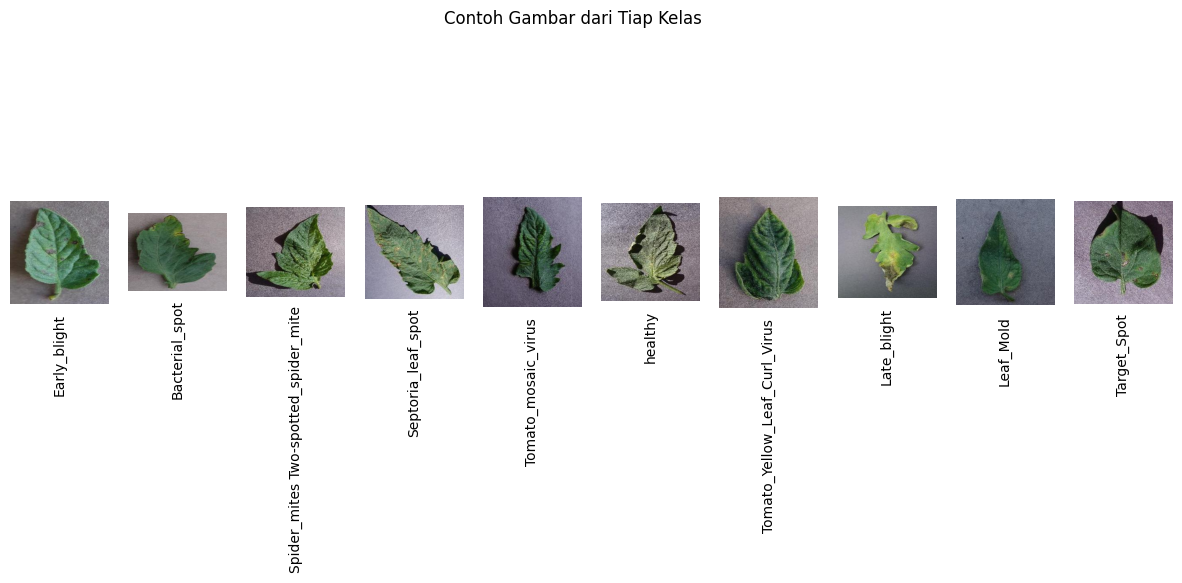

In [23]:
def display_sample_images(directory_path):
    sample_images_by_class = {}

    for current_dir, sub_dirs, file_list in os.walk(directory_path):
        if file_list:
            label = os.path.basename(current_dir)
            chosen_image = random.choice(file_list)
            sample_images_by_class[label] = os.path.join(current_dir, chosen_image)

    fig, axes = plt.subplots(1, len(sample_images_by_class), figsize=(15, 5))
    fig.suptitle('Contoh Gambar dari Tiap Kelas')

    for ax, (label, image_path) in zip(axes, sample_images_by_class.items()):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.text(0.5, -0.1, label, rotation=90, va='top', ha='center', transform=ax.transAxes)
        ax.axis('off')

    plt.show()

# Tentukan path ke direktori utama
main_path = "/content/dataset"

display_sample_images(main_path)

#### Split Dataset

Pada proyek Dicoding, diperlukan setidaknya 10.000 gambar dalam dataset. Untuk meringankan beban kerja, kali ini hanya akan dipilih 4 kelas dari tanaman tomat. Berikut adalah kelas-kelas yang dipilih beserta jumlah gambar dalam dataset:

- Tomato Yellow Leaf Curl Virus: 5.357
- Late Blight: 1.909
- Healthy: 1.591
- Septoria Leaf Spot: 1.771

Totalnya adalah 10.628 gambar.

Menghapus semua folder, kecuali folder yang sudah saya pilih sebelumnya.

In [24]:
def remove_irrelevant_folders(directory, allowed_folders=['Tomato_Yellow_Leaf_Curl_Virus', 'Late_blight','healthy','Septoria_leaf_spot']):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path) and folder not in allowed_folders:
            shutil.rmtree(folder_path)
            print(f"Menghapus folder: {folder_path}")

# Tentukan path direktori utama
main_directory = "/content/dataset"

# Jalankan fungsi untuk menghapus folder yang tidak diinginkan
remove_irrelevant_folders(main_directory)

Menghapus folder: /content/dataset/Early_blight
Menghapus folder: /content/dataset/Bacterial_spot
Menghapus folder: /content/dataset/Spider_mites Two-spotted_spider_mite
Menghapus folder: /content/dataset/Tomato_mosaic_virus
Menghapus folder: /content/dataset/train
Menghapus folder: /content/dataset/test
Menghapus folder: /content/dataset/Leaf_Mold
Menghapus folder: /content/dataset/Target_Spot


Membagi dataset menjadi data latih dan data uji dengan rasio 8:2.

In [25]:
def partition_dataset(base_directory, training_fraction=0.8):
    # Menentukan path untuk data training dan testing
    training_dir = os.path.join(base_directory, 'train')
    testing_dir = os.path.join(base_directory, 'test')

    # Membuat folder train dan test jika belum tersedia
    os.makedirs(training_dir, exist_ok=True)
    os.makedirs(testing_dir, exist_ok=True)

    for current_dir, sub_dirs, file_list in os.walk(base_directory):
        if current_dir == base_directory:
            continue

        category_name = os.path.basename(current_dir)
        if category_name in ['train', 'test']:
            continue

        # Buat direktori untuk kelas di dalam folder train dan test
        train_category_dir = os.path.join(training_dir, category_name)
        test_category_dir = os.path.join(testing_dir, category_name)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        # Acak urutan file
        random.shuffle(file_list)
        split_point = int(training_fraction * len(file_list))
        training_files = file_list[:split_point]
        testing_files = file_list[split_point:]

        # Pindahkan file ke direktori train
        for file_name in training_files:
            source_path = os.path.join(current_dir, file_name)
            destination_path = os.path.join(train_category_dir, file_name)
            shutil.move(source_path, destination_path)

        # Pindahkan file ke direktori test
        for file_name in testing_files:
            source_path = os.path.join(current_dir, file_name)
            destination_path = os.path.join(test_category_dir, file_name)
            shutil.move(source_path, destination_path)

# Tentukan path direktori utama
data_directory = "/content/dataset"

# Jalankan proses pembagian dataset
partition_dataset(data_directory)

Menghapus folder selain folder data latih dan data uji.

In [26]:
def remove_nonessential_directories(main_path, preserved_folders=['train', 'test']):
    for entry in os.listdir(main_path):
        entry_path = os.path.join(main_path, entry)
        if os.path.isdir(entry_path) and entry not in preserved_folders:
            shutil.rmtree(entry_path)
            print(f"Menghapus folder: {entry_path}")

# Path ke direktori utama
main_directory = "/content/dataset"

remove_nonessential_directories(main_directory)

Menghapus folder: /content/dataset/Septoria_leaf_spot
Menghapus folder: /content/dataset/healthy
Menghapus folder: /content/dataset/Tomato_Yellow_Leaf_Curl_Virus
Menghapus folder: /content/dataset/Late_blight


## Modelling

Menggunakan ImageDataGenerator untuk melakukan augmentasi, rescaling, dan mengubah ukuran target.

Dataset uji hanya akan mengalami rescaling.

In [27]:
def augment_and_resize_images(base_path, img_size=(150, 150), batch_size=32):
    train_dir = os.path.join(base_path, 'train')
    test_dir = os.path.join(base_path, 'test')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Hanya melakukan rescale pada data uji
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, test_generator

# Path ke folder utama
dataset_path = "/content/dataset"

train_generator, test_generator = augment_and_resize_images(dataset_path)

Found 8727 images belonging to 4 classes.
Found 1901 images belonging to 4 classes.


Menampilkan kelas-kelas yang terdapat dalam dataset.

In [28]:
label_mapping = train_generator.class_indices
print(label_mapping)

{'Late_blight': 0, 'Septoria_leaf_spot': 1, 'Tomato_Yellow_Leaf_Curl_Virus': 2, 'healthy': 3}


Menggunakan transfer learning dari MobileNetV2 dengan ukuran input 150x150. Beberapa layer dibekukan agar tidak dilatih ulang, dan menambahkan beberapa layer Conv serta Pooling.

In [29]:
# Memuat model MobileNetV2 tanpa lapisan paling atas dan dengan bobot pre-trained ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Membekukan semua layer pada model dasar
for layer in base_model.layers:
    layer.trainable = False

# Membangun model baru dengan arsitektur tambahan
custom_model = Sequential()
custom_model.add(base_model)

# Menambahkan beberapa layer konvolusi dan pooling
custom_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
custom_model.add(MaxPooling2D((2, 2)))
custom_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
custom_model.add(MaxPooling2D((2, 2)))

# Menambahkan flatten dan dense layer
custom_model.add(Flatten(name='flatten'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(128, activation='relu'))

# Layer output dengan 4 kelas dan fungsi aktivasi softmax
custom_model.add(Dense(4, activation='softmax'))

Mengompilasi model menggunakan optimizer Adam, loss categorical_crossentropy, dan metrik akurasi.

In [30]:
# Menyusun model dengan optimizer Adam, loss function categorical crossentropy, dan metrik akurasi
adam_optimizer = tf.optimizers.Adam()
custom_model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Membuat callbacks yang mengawasi val_accuracy dan akan menghentikan pelatihan jika tidak ada perubahan selama 3 epochs.

In [31]:
# Inisialisasi callback untuk menyimpan model terbaik dan menghentikan pelatihan lebih awal
save_best = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

stop_early = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
    mode='max',
    baseline=0.96
)

Melatih model selama 10 epoch dan menggunakan data uji sebagai validasi.

In [32]:
# Proses pelatihan model
jumlah_epoch = 10

history = custom_model.fit(
    train_generator,
    epochs=jumlah_epoch,
    validation_data=test_generator,
    callbacks=[save_best, stop_early],
    verbose=1
)

Epoch 1/10
273/273 [==============================] - 221s 793ms/step - loss: 0.2960 - accuracy: 0.8997 - val_loss: 0.1562 - val_accuracy: 0.9490
Epoch 2/10
273/273 [==============================] - 228s 834ms/step - loss: 0.1303 - accuracy: 0.9574 - val_loss: 0.0638 - val_accuracy: 0.9779
Epoch 3/10
273/273 [==============================] - 217s 792ms/step - loss: 0.1004 - accuracy: 0.9692 - val_loss: 0.2047 - val_accuracy: 0.9395
Epoch 4/10
273/273 [==============================] - 217s 793ms/step - loss: 0.0869 - accuracy: 0.9754 - val_loss: 0.0632 - val_accuracy: 0.9800
Epoch 5/10
273/273 [==============================] - 215s 788ms/step - loss: 0.0727 - accuracy: 0.9794 - val_loss: 0.0687 - val_accuracy: 0.9790
Epoch 6/10
273/273 [==============================] - 217s 794ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.0723 - val_accuracy: 0.9784
Epoch 7/10
273/273 [==============================] - 216s 790ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0615 -

## Evaluasi dan Visualisasi

Menampilkan grafik akurasi data latih dan validasi, serta grafik loss data latih dan validasi.

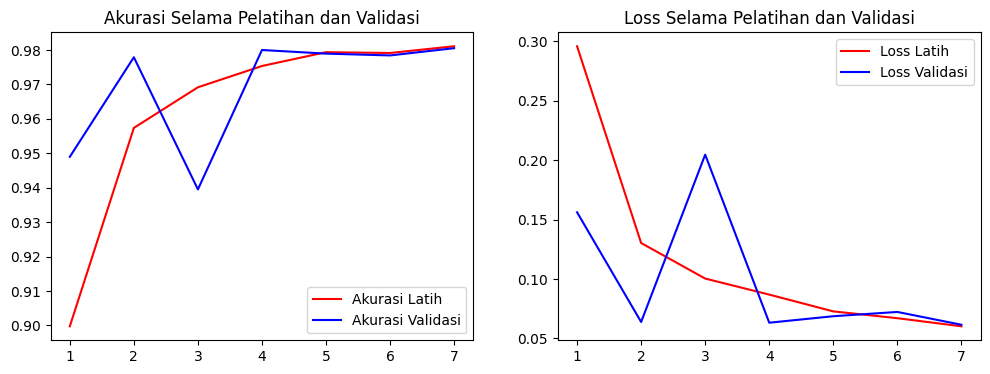

In [33]:
def tampilkan_grafik_training(riwayat):
    akurasi = riwayat.history['accuracy']
    val_akurasi = riwayat.history['val_accuracy']
    kerugian = riwayat.history['loss']
    val_kerugian = riwayat.history['val_loss']

    epoch_range = range(1, len(akurasi) + 1)

    plt.figure(figsize=(12, 4))

    # Grafik akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, akurasi, 'r', label='Akurasi Latih')
    plt.plot(epoch_range, val_akurasi, 'b', label='Akurasi Validasi')
    plt.title('Akurasi Selama Pelatihan dan Validasi')
    plt.legend()

    # Grafik loss
    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, kerugian, 'r', label='Loss Latih')
    plt.plot(epoch_range, val_kerugian, 'b', label='Loss Validasi')
    plt.title('Loss Selama Pelatihan dan Validasi')
    plt.legend()

    plt.show()

# Menampilkan grafik hasil training
tampilkan_grafik_training(history)

## Konversi Model

Menyimpan model dalam format .h5.

In [34]:
custom_model.save("model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Konversi TFJS

Mengonversi model ke dalam format TFJS.

In [35]:
pip install --upgrade tensorflow tensorflowjs tensorflow_decision_forests protobuf

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached protobuf-6.30.2-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling

In [36]:
pip install protobuf==3.20.*

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have p

In [37]:

pip install tensorflowjs

  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [38]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-04-04 07:34:44.035431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743752084.059197   37996 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743752084.066442   37996 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743752084.084887   37996 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743752084.084933   37996 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743752084.084938   37996 computation_placer.cc:177] computation placer alr

### Konversi SavedModel

Mengekonversi menjadi saved_model.

In [39]:
# Menentukan path penyimpanan model dalam format TensorFlow SavedModel
lokasi_simpan = os.path.join("models/klasifikasi_gambar/1/")
tf.saved_model.save(custom_model, lokasi_simpan)

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d01634cf1a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d01634cf1a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### Konversi TF-Lite

Mengkonversi model menjadi format TFLITE dan menyimpan label.txt.

In [40]:
# Memuat model Keras dari file .h5
model_keras = tf.keras.models.load_model('model.h5')

# Mengonversi model Keras ke format TensorFlow Lite
konverter = tf.lite.TFLiteConverter.from_keras_model(model_keras)
model_tflite = konverter.convert()

# Menyimpan model hasil konversi ke file .tflite
with open("converted_model.tflite", "wb") as file_output:
    file_output.write(model_tflite)

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d0154de84a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7d0154de84a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [41]:
# Definisikan isi yang ingin disimpan ke dalam file
isi_file = """Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
healthy"""

# Lokasi dan nama file yang akan dibuat
lokasi_file = "/content/klasifikasiGambar.txt"

# Simpan isi ke dalam file
with open(lokasi_file, "w") as berkas:
    berkas.write(isi_file)

Mengompres file menjadi format ZIP agar dapat diunduh ke perangkat lokal.

In [42]:
# Tentukan direktori yang akan dikompres (zip)
direktori_models = '/content/models'
direktori_tfjs = '/content/tfjs_model'

# Tentukan nama file output zip (tanpa ekstensi .zip)
nama_zip_models = '/content/models'
nama_zip_tfjs = '/content/tfjs_model'

# Kompres folder ke dalam format ZIP
shutil.make_archive(nama_zip_models, 'zip', direktori_models)
shutil.make_archive(nama_zip_tfjs, 'zip', direktori_tfjs)

'/content/tfjs_model.zip'

In [43]:
!pip freeze > requirements.txt

## Inference

Melakukan inferensi pada model yang telah dideploy menggunakan TensorFlow Serving.

In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.lite.python.interpreter import Interpreter

Melakukan prediksi dengan menggunakan satu gambar untuk masing-masing kelas.

In [45]:
# Path ke model TFLite - Update path ke lokasi model yang benar
model_path = 'converted_model.tflite'

# Inisialisasi interpreter TFLite
interpreter = Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Ambil input dan output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Label kelas yang sesuai dengan output model
class_labels = ['Late_blight', 'Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'healthy']

# Pastikan folder 'images' ada
os.makedirs("images", exist_ok=True)

# List gambar yang akan diproses
filenames = [
    "images/healthy.JPG",
    "images/Late_blight.JPG",
    "images/Septoria_leaf_spot.JPG",
    "images/Tomato_Yellow_Leaf_Curl_Virus.JPG"
]

# Proses dan lakukan prediksi pada setiap gambar
for image_path in filenames:
    if not os.path.exists(image_path):
        print(f"⚠️ Warning: Image file not found: {image_path}")
        continue  # Lewati gambar yang tidak ditemukan

    # Muat dan preprocess gambar
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalisasi

    # Inference menggunakan TFLite
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Ambil kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(output_data)
    print(f"✅ Prediksi kelas untuk {os.path.basename(image_path)}: {class_labels[predicted_class]}")

✅ Prediksi kelas untuk healthy.JPG: healthy
✅ Prediksi kelas untuk Late_blight.JPG: Late_blight
✅ Prediksi kelas untuk Septoria_leaf_spot.JPG: Septoria_leaf_spot
✅ Prediksi kelas untuk Tomato_Yellow_Leaf_Curl_Virus.JPG: Tomato_Yellow_Leaf_Curl_Virus
